In [2]:
%pip install psycopg2-binary pymysql pymongo matplotlib numpy

import time
import psycopg2
import pymysql
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np

SERVER_IP = "37.233.80.52"

POSTGRES_CONFIG = {
    "host": SERVER_IP,
    "port": 5433,
    "user": "airflow",
    "password": "airflow",
    "database": "ods_hh"
}

MYSQL_CONFIG = {
    "host": SERVER_IP,
    "port": 3307,
    "user": "airflow",
    "password": "airflow",
    "database": "ods_hh"
}

MONGO_CONFIG = {
    "host": SERVER_IP,
    "port": 27018,
    "database": "ods_trains"
}

POSTGRES_TABLES = ["ods_trains_basic_pg", "ods_trains_cars_pg", "ods_trains_seats_pg"]
MYSQL_TABLES = ["ods_trains_basic_mysql", "ods_trains_cars_mysql", "ods_trains_seats_mysql"]
MONGO_COLLECTIONS = ["ods_trains_basic", "ods_trains_cars", "ods_trains_seats"]


  Using cached psycopg2_binary-2.9.11-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.9 kB)
  Using cached pymysql-1.1.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached pymongo-4.15.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (22 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.5-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached dnspython-2.8.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached psycopg2_binary-2.9.11-cp312-cp312-macosx_11_0_arm64.whl (3.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.7/920.7 kB 8.1 MB/s eta 0:00:00


In [3]:
def benchmark_postgres():
    results = {}
    conn = psycopg2.connect(**POSTGRES_CONFIG)
    cur = conn.cursor()
    
    for table in POSTGRES_TABLES:
        start = time.time()
        cur.execute(f"SELECT COUNT(*) FROM {table}")
        cur.fetchone()
        elapsed = time.time() - start
        results[table] = elapsed
    
    cur.close()
    conn.close()
    return results

def benchmark_mysql():
    results = {}
    conn = pymysql.connect(**MYSQL_CONFIG)
    cur = conn.cursor()
    
    for table in MYSQL_TABLES:
        start = time.time()
        cur.execute(f"SELECT COUNT(*) FROM {table}")
        cur.fetchone()
        elapsed = time.time() - start
        results[table] = elapsed
    
    cur.close()
    conn.close()
    return results

def benchmark_mongo():
    results = {}
    client = MongoClient(MONGO_CONFIG["host"], MONGO_CONFIG["port"])
    db = client[MONGO_CONFIG["database"]]
    
    for collection_name in MONGO_COLLECTIONS:
        collection = db[collection_name]
        start = time.time()
        collection.count_documents({})
        elapsed = time.time() - start
        results[collection_name] = elapsed
    
    client.close()
    return results


In [4]:
pg_results = benchmark_postgres()
mysql_results = benchmark_mysql()
mongo_results = benchmark_mongo()


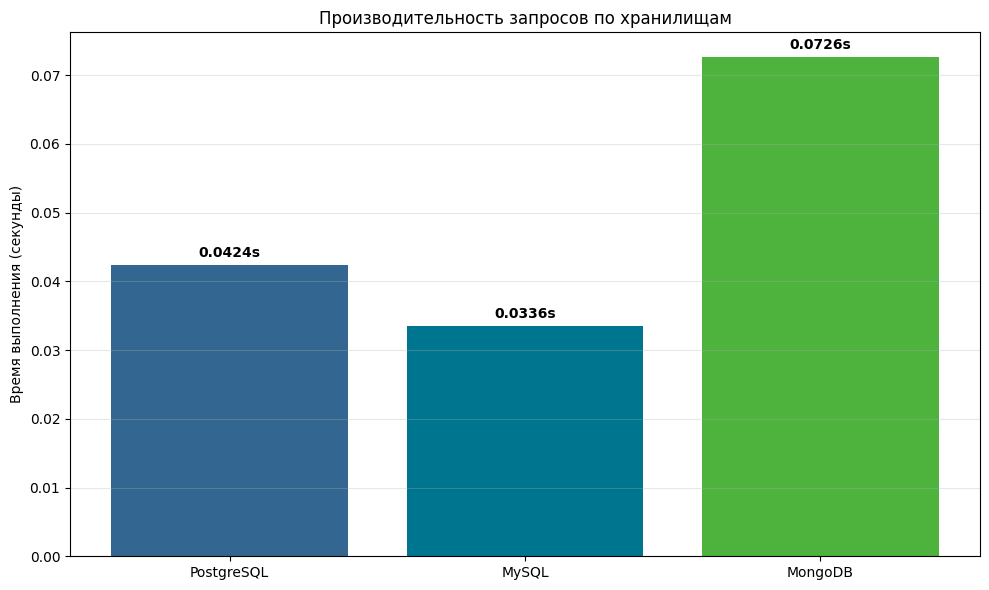

In [5]:
pg_avg = np.mean(list(pg_results.values()))
mysql_avg = np.mean(list(mysql_results.values()))
mongo_avg = np.mean(list(mongo_results.values()))

databases = ['PostgreSQL', 'MySQL', 'MongoDB']
times = [pg_avg, mysql_avg, mongo_avg]

plt.figure(figsize=(10, 6))
bars = plt.bar(databases, times, color=['#336791', '#00758F', '#4DB33D'])
plt.ylabel('Время выполнения (секунды)')
plt.title('Производительность запросов по хранилищам')
plt.grid(axis='y', alpha=0.3)

for i, (db, time_val) in enumerate(zip(databases, times)):
    plt.text(i, time_val + max(times) * 0.01, f'{time_val:.4f}s', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
